In [1]:
! pip install scipy==1.7.0
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
warnings.filterwarnings("ignore")
from bayes_opt import BayesianOptimization, UtilityFunction
import sklearn as sklearn
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.neural_network import MLPRegressor
import plotly.express as px
import plotly.graph_objects as go

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f85271b50>,
      dtype=object)

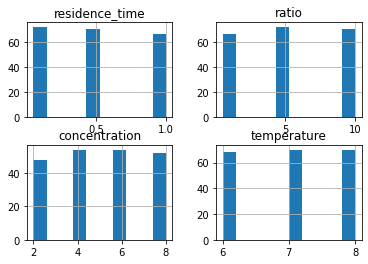

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Rutgers/Merck folder/dataset_alkox.csv")
df.iloc[:,:-1].hist()

In [4]:
df[df.iloc[:,-1]==sort(df.iloc[:,-1].unique())[-1]]

,residence_time,ratio,concentration,temperature,conversion
120,0.5,10.0,2,6,106.480942
121,0.5,10.0,2,6,106.480942


In [5]:
y_data, indices = np.unique(df.iloc[:,-1],return_index=True)
i=random.choices(indices,k=2080)
x_data,y_data = df.iloc[i,:-1],df.iloc[i,-1]
# nrows = len(df)
# total_sample_size = 1e4


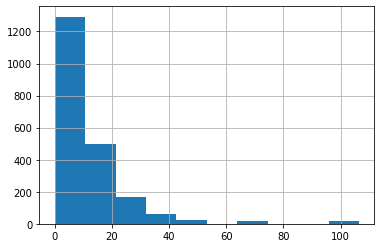

In [6]:
y_data.hist()

In [7]:
rfr = RandomForestRegressor()

In [8]:
model = RandomForestRegressor()#MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)#svm.SVR(kernel='rbf')#RandomForestRegressor()
model.fit(x_data, y_data)
def black_box_function2(residence_time,ratio,concentration,temperature):
    x_data_for_real=vstack((residence_time,ratio,concentration,temperature)).T
    predictions = model.predict(x_data_for_real)
    return np.max(predictions)+np.random.normal(0,1)#think about a variance between 0.1 and 0.2

In [9]:
df2=x_data.join(pd.DataFrame(y_data))
df2

,residence_time,ratio,concentration,temperature,conversion
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
...,...,...,...,...,...
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760


In [10]:
df2[df2.iloc[:,-1]==sort(df2.iloc[:,-1].unique())[-1]]


,residence_time,ratio,concentration,temperature,conversion
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
...,...,...,...,...,...
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942


In [11]:
black_box_function2(0.5,10.0,2,6)

106.80785761656043

In [12]:
pbounds1={"residence_time": [x_data['residence_time'].min(), x_data['residence_time'].max()],#x_data['residence_time'].unique(),
         "ratio": [x_data['ratio'].min(), x_data['ratio'].max()],#x_data['ratio'].unique(),
         "concentration": [x_data['concentration'].min(), x_data['concentration'].max()],#x_data['concentration'].unique(),
         "temperature": [x_data['temperature'].min(), x_data['temperature'].max()]}

In [13]:
param_grid=[{"residence_time": [x_data['residence_time'].min(), x_data['residence_time'].max()],#x_data['residence_time'].unique(),
         "ratio": [x_data['ratio'].min(), x_data['ratio'].max()],#x_data['ratio'].unique(),
         "concentration": [x_data['concentration'].min(), x_data['concentration'].max()],#x_data['concentration'].unique(),
         "temperature": [x_data['temperature'].min(), x_data['temperature'].max()]}]

In [14]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}

In [15]:
x_data.residence_time.unique()
k=50
def iterator(x,i,k):
    return(np.linspace(x.iloc[:,i].min(), x.iloc[:,i].max(), num=k))
iterator(x_data,0,6)

array([0.05, 0.24, 0.43, 0.62, 0.81, 1.  ])

In [16]:
res=[]
rat=[]
con=[]
temp=[]
bbv=[]
k=6
for residence_time in iterator(x_data,0,k):
    for ratio in iterator(x_data,1,k):
        for concentration in iterator(x_data,2,k):
            for temperature in iterator(x_data,3,k):
                res.append(residence_time)                
                rat.append(ratio)
                con.append(concentration)
                temp.append(temperature)
                bbv.append(black_box_function2(residence_time,ratio,concentration,temperature))

In [17]:
p=df[df.iloc[:,-1]==sort(df.iloc[:,-1].unique())[-1]]
p[p.index==120].reset_index(drop=True).style.set_caption("Maximum conversion value from data")


,residence_time,ratio,concentration,temperature,conversion
0,0.500000,10.000000,2,6,106.480942


In [18]:
pd.DataFrame([0.5,10.000000,2,6, black_box_function2(0.5,10.0,2,6)],index=['residence_time','ratio','concentration','temperature','conversion']).T.style.set_caption("Maximum conversion value from black box function")

,residence_time,ratio,concentration,temperature,conversion
0,0.500000,10.000000,2.000000,6.000000,105.203323


In [19]:
grid=pd.DataFrame([res,rat,con,temp,bbv],index=['residence_time','ratio','concentration','temperature','conversion']).T
grid[grid.conversion==grid.conversion.max()]

,residence_time,ratio,concentration,temperature,conversion
829,0.62,10.0,2.0,6.4,107.290089


In [20]:
fig = px.scatter_3d(df, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()
fig = px.scatter_3d(grid, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()

In [21]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}

In [22]:
from bayes_opt import SequentialDomainReductionTransformer

In [23]:
bounds_transformer = SequentialDomainReductionTransformer(minimum_window=0.5)

In [24]:
init_points=100
n_iter=50
optimizer = BayesianOptimization(f = black_box_function2,
                                 pbounds = pbounds1,
                                 random_state=1,
                                 bounds_transformer=bounds_transformer)
optimizer.maximize(init_points = init_points, n_iter = n_iter)

|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 7.45      | 4.502     | 7.343     | 0.05011   | 6.605     |
| 2         | 1.372     | 2.881     | 1.377     | 0.2269    | 6.691     |
| 3         | 10.59     | 4.381     | 5.619     | 0.4482    | 7.37      |
| 4         | 5.78      | 3.227     | 8.842     | 0.07602   | 7.341     |
| 5         | 8.907     | 4.504     | 5.808     | 0.1834    | 6.396     |
| 6         | 43.23     | 6.804     | 9.698     | 0.3478    | 7.385     |
| 7         | 35.33     | 7.258     | 8.999     | 0.1308    | 6.078     |
| 8         | 8.43      | 3.019     | 8.842     | 0.1434    | 6.842     |
| 9         | 27.93     | 7.747     | 5.565     | 0.7073    | 6.631     |
| 10        | 3.451     | 6.119     | 8.429     | 0.06737   | 7.5       |
| 11        | 5.536     | 7.933     | 7.608     | 0.3164    | 7.579     |
| 12        | 1.995     | 2.619     | 

In [25]:
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

Best result: {'concentration': 2.7229784907223618, 'ratio': 8.43476314562359, 'residence_time': 0.500878859645155, 'temperature': 6.213230960849889}; f(x) = 108.90289588922494.


| 151       | 107.9     | 2.673     | 8.336     | 0.4076    | 6.202     |
| 152       | 107.7     | 2.667     | 8.19      | 0.5028    | 6.279     |
| 153       | 107.8     | 2.685     | 8.226     | 0.3547    | 5.962     |
| 154       | 104.5     | 2.473     | 8.245     | 0.5355    | 6.098     |
| 155       | 106.7     | 2.552     | 8.424     | 0.5042    | 6.022     |
| 156       | 107.7     | 2.675     | 8.436     | 0.3168    | 6.249     |
| 157       | 105.3     | 2.766     | 8.486     | 0.5226    | 5.992     |
| 158       | 106.0     | 2.474     | 8.283     | 0.3193    | 5.97      |
| 159       | 107.3     | 2.89      | 8.205     | 0.5143    | 5.982     |
| 160       | 107.2     | 2.676     | 8.302     | 0.4351    | 6.394     |
| 161       | 108.0     | 2.873     | 8.321     | 0.6002    | 6.184     |
| 162       | 106.8     | 2.625     | 8.279     | 0.4888    | 6.359     |
| 163       | 106.6     | 2.682     | 8.296     | 0.4805    | 6.361     |
| 164       | 104.4     | 2.646     | 

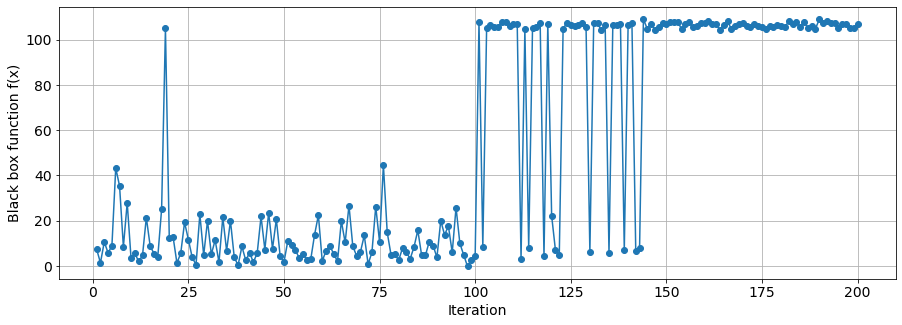

In [26]:
utility = UtilityFunction(kind = "ei", kappa = 1.96, xi = 0.01)
# Optimization for loop.
for i in range(50):
    # Get optimizer to suggest new parameter values to try using the
    # specified acquisition function.
    next_point = optimizer.suggest(utility)
    # Force degree from float to int.
    # next_point["degree"] = int(next_point["degree"])
    # Evaluate the output of the black_box_function using 
    # the new parameter values.
    target = black_box_function2(**next_point)
    try:
        # Update the optimizer with the evaluation results. 
        # This should be in try-except to catch any errors!
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f7cef82e0>,
      dtype=object)

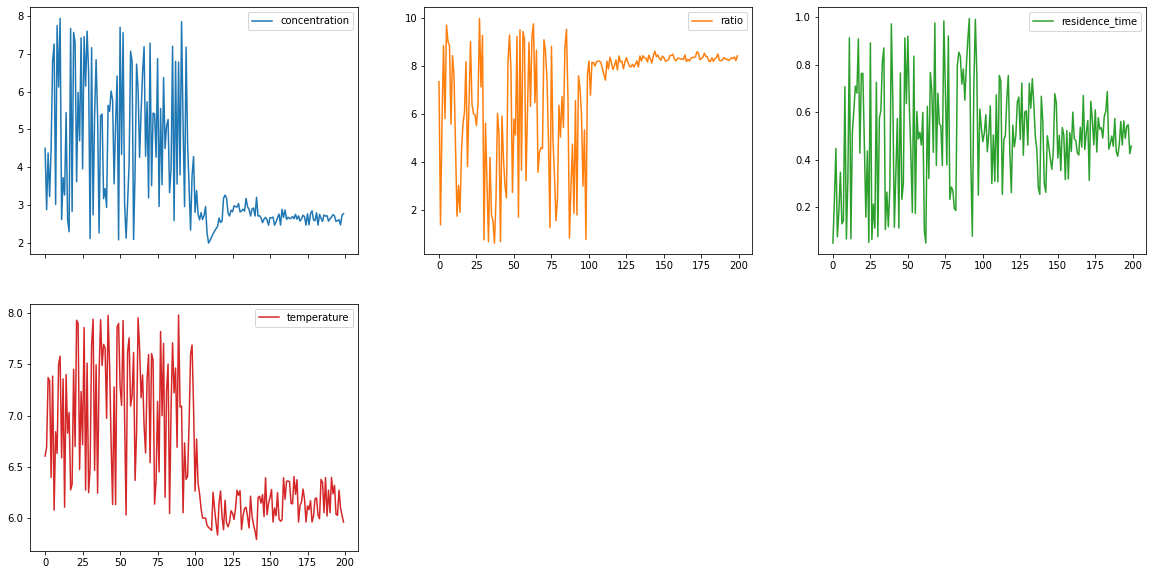

In [27]:
pd.DataFrame(optimizer.space.params,columns=['concentration','ratio','residence_time','temperature']).plot(subplots=True, layout=(2,3),figsize=(20, 10))

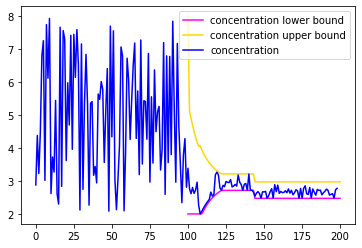

In [28]:
# example x-bound shrinking - we need to shift the x-axis by the init_points as the bounds
# transformer only mutates when searching - not in the initial phase.
a = np.empty((init_points,))
a[:] = np.nan
concentration_min_bound = np.array([b[0][0] for b in bounds_transformer.bounds])
concentration_min_bound=np.hstack(([a],[concentration_min_bound])).T
concentration_min_bound=np.column_stack((concentration_min_bound.T,np.repeat(concentration_min_bound[-1], n_iter).reshape(1,-1))).T

concentration_max_bound = np.array([b[0][1] for b in bounds_transformer.bounds])
concentration_max_bound=np.hstack(([a],[concentration_max_bound])).T
concentration_max_bound=np.column_stack((concentration_max_bound.T,np.repeat(concentration_max_bound[-1], n_iter).reshape(1,-1))).T


c = [c[0] for c in optimizer.space.params]
plt.plot(concentration_min_bound, label='concentration lower bound',color='magenta')
plt.plot(concentration_max_bound, label='concentration upper bound',color='gold')
plt.plot(c[1:], label='concentration',color='blue')
plt.legend()

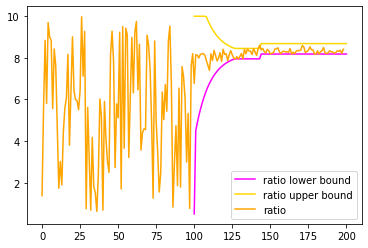

In [29]:
ratio_min_bound = [b[1][0] for b in bounds_transformer.bounds]
ratio_min_bound=np.hstack(([a],[ratio_min_bound])).T
ratio_min_bound=np.column_stack((ratio_min_bound.T,np.repeat(ratio_min_bound[-1], n_iter).reshape(1,-1))).T

ratio_max_bound = [b[1][1] for b in bounds_transformer.bounds]
ratio_max_bound=np.hstack(([a],[ratio_max_bound])).T
ratio_max_bound=np.column_stack((ratio_max_bound.T,np.repeat(ratio_max_bound[-1], n_iter).reshape(1,-1))).T

c = [c[1] for c in optimizer.space.params]
plt.plot(ratio_min_bound, label='ratio lower bound',color='magenta')
plt.plot(ratio_max_bound, label='ratio upper bound',color='gold')
plt.plot(c[1:], label='ratio',color='orange')
plt.legend()

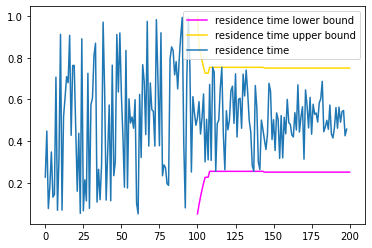

In [30]:
residence_time_min_bound = [b[2][0] for b in bounds_transformer.bounds]
residence_time_min_bound=np.hstack(([a],[residence_time_min_bound])).T
residence_time_min_bound=np.column_stack((residence_time_min_bound.T,np.repeat(residence_time_min_bound[-1], n_iter).reshape(1,-1))).T


residence_time_max_bound = [b[2][1] for b in bounds_transformer.bounds]
residence_time_max_bound=np.hstack(([a],[residence_time_max_bound])).T
residence_time_max_bound=np.column_stack((residence_time_max_bound.T,np.repeat(residence_time_max_bound[-1], n_iter).reshape(1,-1))).T


c = [c[2] for c in optimizer.space.params]
plt.plot(residence_time_min_bound, label='residence time lower bound',color='magenta')
plt.plot(residence_time_max_bound, label='residence time upper bound',color='gold')
plt.plot(c[1:], label='residence time')
plt.legend()

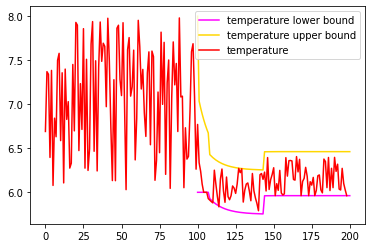

In [31]:
temperature_min_bound = [b[3][0] for b in bounds_transformer.bounds]
temperature_min_bound=np.hstack(([a],[temperature_min_bound])).T
temperature_min_bound=np.column_stack((temperature_min_bound.T,np.repeat(temperature_min_bound[-1], n_iter).reshape(1,-1))).T

temperature_max_bound = [b[3][1] for b in bounds_transformer.bounds]
temperature_max_bound=np.hstack(([a],[temperature_max_bound])).T
temperature_max_bound=np.column_stack((temperature_max_bound.T,np.repeat(temperature_max_bound[-1], n_iter).reshape(1,-1))).T

c = [c[3] for c in optimizer.space.params]
plt.plot(temperature_min_bound, label='temperature lower bound',color='magenta')
plt.plot(temperature_max_bound, label='temperature upper bound',color='gold')
plt.plot(c[1:], label='temperature',color='red')
plt.legend()

In [32]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}

# Figure showing the cumulative maximium 

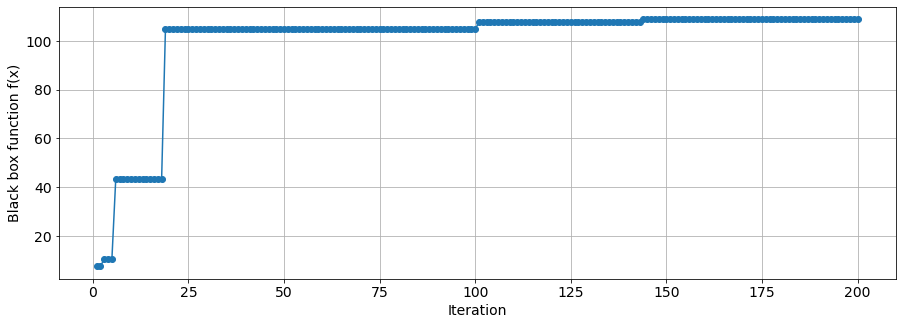

In [33]:
plt.figure(figsize = (15, 5))
cummulative_max=pd.Series(optimizer.space.target).cummax()
plt.plot(range(1, 1 + len(cummulative_max)), cummulative_max, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

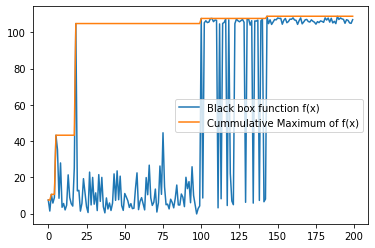

In [34]:
pd.DataFrame([optimizer.space.target,pd.Series(optimizer.space.target).cummax()],index=["Black box function f(x)","Cummulative Maximum of f(x)"]).T.plot()

# Running a few trials with different random seeds

In [35]:
def blackboxoptseedfunction(init_points,n_iter,loop_iterations,seed,variance_between_0p1_and_0p2):
    import random
    df_plot=df.copy()

    random.seed(seed)
    
    def inner_black_box_function2(residence_time,ratio,concentration,temperature):
        x_data_for_real=vstack((residence_time,ratio,concentration,temperature)).T
        predictions = model.predict(x_data_for_real)
        return np.max(predictions)+np.random.normal(0,variance_between_0p1_and_0p2)#think about a variance between 0.1 and 0.2


    optimizer = BayesianOptimization(f = inner_black_box_function2,
                                     random_state=seed,
                                    pbounds = pbounds1)
    optimizer.maximize(init_points = init_points, n_iter = n_iter)
    utility = UtilityFunction(kind = "poi", kappa = 1.96, xi = 0.01)
    # Optimization for loop.
    for i in range(loop_iterations):
        # Get optimizer to suggest new parameter values to try using the
        # specified acquisition function.
        next_point = optimizer.suggest(utility)
        n_point_df=pd.DataFrame([next_point], columns=next_point.keys())
        bbf_point_df=pd.DataFrame([black_box_function2(**next_point)],columns=["conversion"])
        next_point_df=n_point_df.join(bbf_point_df)
        df_plot=pd.concat([df_plot, next_point_df], ignore_index=True)
        # Force degree from float to int.
        # next_point["degree"] = int(next_point["degree"])
        # Evaluate the output of the black_box_function using 
        # the new parameter values.
        target = black_box_function2(**next_point)
        try:
            # Update the optimizer with the evaluation results. 
            # This should be in try-except to catch any errors!
            optimizer.register(params = next_point, target = target)
        except:
            pass
    print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
    plt.figure(figsize = (15, 5))
    optimization_data=pd.DataFrame([optimizer.space.target,pd.Series(optimizer.space.target).cummax()],index=["Black box function f(x)","Cummulative Maximum of f(x)"]).T
    optimization_data.plot(figsize=(20, 10))
    plt.grid(True)
    plt.xlabel("Iteration", fontsize = 14)
    plt.ylabel("Black box function f(x)", fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    fig = px.scatter_3d(df.copy(), x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
    fig.show()
    fig = px.scatter_3d(df_plot, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
    fig.show()

|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 7.293     | 4.502     | 7.343     | 0.05011   | 6.605     |
| 2         | 2.176     | 2.881     | 1.377     | 0.2269    | 6.691     |
| 3         | 9.47      | 4.381     | 5.619     | 0.4482    | 7.37      |
| 4         | 7.951     | 3.227     | 8.842     | 0.07602   | 7.341     |
| 5         | 8.637     | 4.504     | 5.808     | 0.1834    | 6.396     |
| 6         | 44.99     | 6.804     | 9.698     | 0.3478    | 7.385     |
| 7         | 33.55     | 7.258     | 8.999     | 0.1308    | 6.078     |
| 8         | 8.126     | 3.019     | 8.842     | 0.1434    | 6.842     |
| 9         | 26.25     | 7.747     | 5.565     | 0.7073    | 6.631     |
| 10        | 4.899     | 6.119     | 8.429     | 0.06737   | 7.5       |
| 11        | 5.949     | 7.933     | 7.608     | 0.3164    | 7.579     |
| 12        | 2.803     | 2.619     | 

<Figure size 1080x360 with 0 Axes>

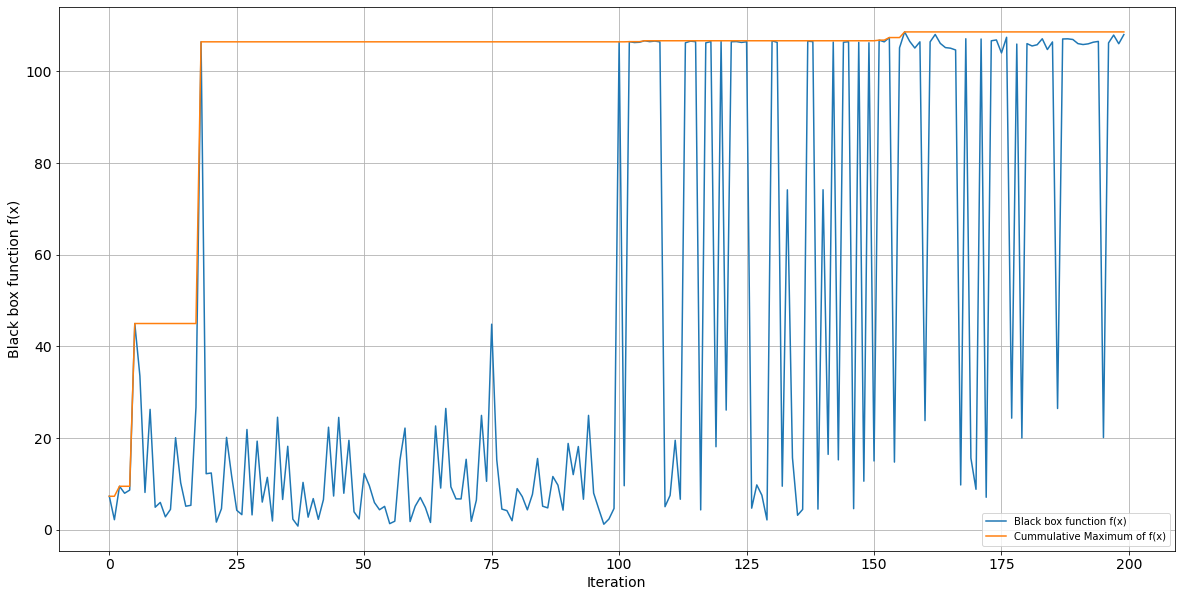

In [36]:
blackboxoptseedfunction(100,50,50,1,0.15)

|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 9.849     | 4.616     | 0.7463    | 0.5722    | 6.871     |
| 2         | 7.372     | 4.522     | 3.638     | 0.2444    | 7.239     |
| 3         | 9.431     | 3.798     | 3.035     | 0.6401    | 7.058     |
| 4         | 0.8696    | 2.807     | 5.379     | 0.2252    | 7.571     |
| 5         | 26.71     | 7.124     | 5.195     | 0.8542    | 6.159     |
| 6         | 17.73     | 5.031     | 1.12      | 0.4567    | 6.193     |
| 7         | -0.2024   | 2.763     | 6.169     | 0.2647    | 6.214     |
| 8         | 19.92     | 3.322     | 3.823     | 0.4944    | 6.403     |
| 9         | 22.46     | 5.842     | 5.089     | 0.53      | 6.774     |
| 10        | 7.028     | 6.762     | 6.01      | 0.2042    | 7.402     |
| 11        | 12.22     | 7.787     | 5.25      | 0.895     | 6.683     |
| 12        | 6.855     | 5.403     | 

<Figure size 1080x360 with 0 Axes>

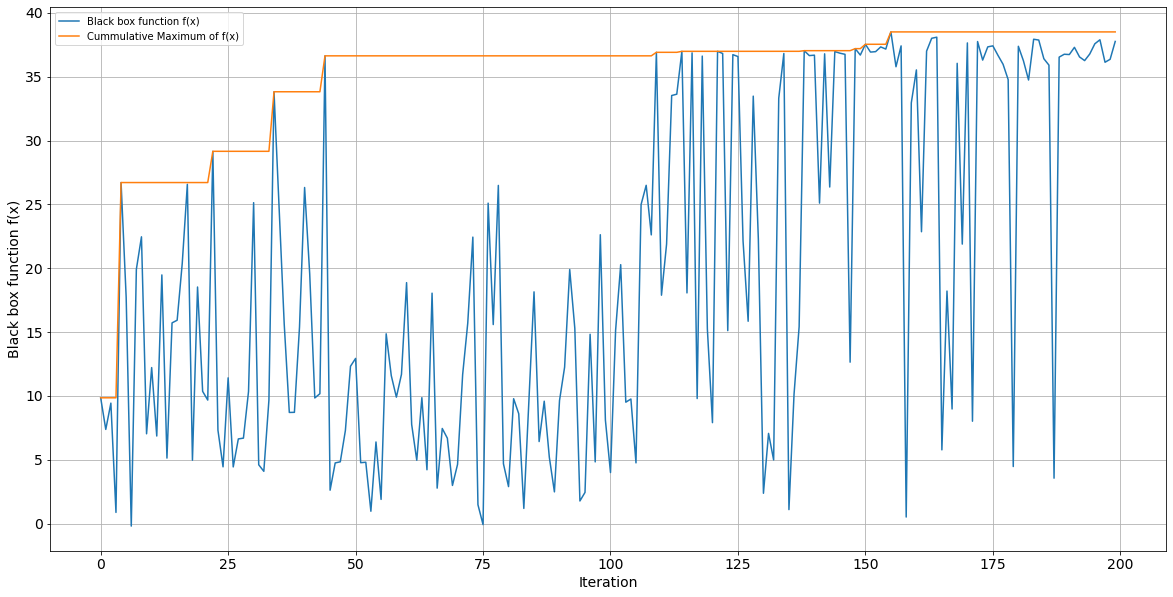

In [37]:
blackboxoptseedfunction(100,50,50,2,0.15)